# Customer Service Requests Analysis | Project 2

# Solution:

## 1. Import a 311 NYC service request and preprocessing

In [24]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
import datetime

from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [31]:
# Reading the dataset
# Since our dataset is quite extensive, we need to set the low_memory parameter to False for efficient processing.
dataset = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', low_memory = False)

In [30]:
# Display the first five elements of the dataset.
dataset.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [27]:
# Reviewing the shape of the dataset
dataset.shape

(364558, 53)

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

I will drop columns with a high number of null values and unnecessary columns from the dataset.

In [32]:
dataset.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [33]:
# Removeing the irrelevant columns from the dataset
drop_columns = ['Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 2','Intersection Street 1',
'Intersection Street 2','Address Type','Park Facility Name','Park Borough','School Name',
'School Number','School Region','School Code','School Phone Number','School Address','School City',
'School State','School Zip','School Not Found','School or Citywide Complaint','Vehicle Type',
'Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction',
'Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name','Landmark',
'X Coordinate (State Plane)','Y Coordinate (State Plane)','Due Date','Resolution Action Updated Date','Community Board','Facility Type',
'Location']

dataset = dataset.drop(drop_columns, axis=1)

In [34]:
# Now, reviewing the shape of the dataset
dataset.shape

(364558, 14)

### Examine the dataset for null values

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unique Key              364558 non-null  int64  
 1   Created Date            364558 non-null  object 
 2   Closed Date             362177 non-null  object 
 3   Agency                  364558 non-null  object 
 4   Complaint Type          364558 non-null  object 
 5   Descriptor              358057 non-null  object 
 6   Location Type           364425 non-null  object 
 7   Incident Zip            361560 non-null  float64
 8   City                    361561 non-null  object 
 9   Status                  364558 non-null  object 
 10  Resolution Description  364558 non-null  object 
 11  Borough                 364558 non-null  object 
 12  Latitude                360528 non-null  float64
 13  Longitude               360528 non-null  float64
dtypes: float64(3), int64

In [36]:
# Check the count of null values in each column.
dataset.isnull().sum()

Unique Key                   0
Created Date                 0
Closed Date               2381
Agency                       0
Complaint Type               0
Descriptor                6501
Location Type              133
Incident Zip              2998
City                      2997
Status                       0
Resolution Description       0
Borough                      0
Latitude                  4030
Longitude                 4030
dtype: int64

In [37]:
# Filter the dataset to include only closed cases, which will help eliminate the null values

dataset = dataset[dataset['Status'] == 'Closed']

In [38]:
dataset.isnull().sum()

Unique Key                   0
Created Date                 0
Closed Date                  0
Agency                       0
Complaint Type               0
Descriptor                6490
Location Type               67
Incident Zip               675
City                       674
Status                       0
Resolution Description       0
Borough                      0
Latitude                  1707
Longitude                 1707
dtype: int64

In [39]:
# Drop the "Status" column as it has the same value for all records in the dataset
dataset = dataset.drop(['Status'], axis = 1)

In [40]:
dataset.shape

(362114, 13)

In [41]:
dataset = dataset[(dataset['Descriptor'].notnull()) & (dataset['Latitude'].notnull()) &(dataset['Longitude'].notnull())]

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 353988 entries, 0 to 364557
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unique Key              353988 non-null  int64  
 1   Created Date            353988 non-null  object 
 2   Closed Date             353988 non-null  object 
 3   Agency                  353988 non-null  object 
 4   Complaint Type          353988 non-null  object 
 5   Descriptor              353988 non-null  object 
 6   Location Type           353933 non-null  object 
 7   Incident Zip            353948 non-null  float64
 8   City                    353948 non-null  object 
 9   Resolution Description  353988 non-null  object 
 10  Borough                 353988 non-null  object 
 11  Latitude                353988 non-null  float64
 12  Longitude               353988 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 37.8+ MB


In [42]:
# Now, only "Descriptor," "Latitude," and "Longitude" have over 1,000 null values
dataset.isnull().sum()

Unique Key                 0
Created Date               0
Closed Date                0
Agency                     0
Complaint Type             0
Descriptor                 0
Location Type             55
Incident Zip              40
City                      40
Resolution Description     0
Borough                    0
Latitude                   0
Longitude                  0
dtype: int64

In [43]:
# I will remove the remaining null values from our dataset
dataset = dataset[(dataset['Location Type'].notnull()) & (dataset['Incident Zip'].notnull()) &(dataset['City'].notnull())]

# rechecking for null values
dataset.isnull().sum()

Unique Key                0
Created Date              0
Closed Date               0
Agency                    0
Complaint Type            0
Descriptor                0
Location Type             0
Incident Zip              0
City                      0
Resolution Description    0
Borough                   0
Latitude                  0
Longitude                 0
dtype: int64

## 2. Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)

In [45]:
# Converting 'Created Date' and 'Closed Date' to datetime datatype

cols = ['Created Date', 'Closed Date']
for col in cols:
    dataset[col] = pd.to_datetime(dataset[col],infer_datetime_format=True)
    
# creating a new column Request_Closing_Time
dataset['Request_Closing_Time'] = dataset[cols[1]] - dataset[cols[0]]

# viewing the info to see the data types
dataset.info()

/tmp/ipykernel_2696/1008614261.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataset[col] = pd.to_datetime(dataset[col],infer_datetime_format=True)
/tmp/ipykernel_2696/1008614261.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataset[col] = pd.to_datetime(dataset[col],infer_datetime_format=True)


<class 'pandas.core.frame.DataFrame'>
Index: 353891 entries, 0 to 364557
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   Unique Key              353891 non-null  int64          
 1   Created Date            353891 non-null  datetime64[ns] 
 2   Closed Date             353891 non-null  datetime64[ns] 
 3   Agency                  353891 non-null  object         
 4   Complaint Type          353891 non-null  object         
 5   Descriptor              353891 non-null  object         
 6   Location Type           353891 non-null  object         
 7   Incident Zip            353891 non-null  float64        
 8   City                    353891 non-null  object         
 9   Resolution Description  353891 non-null  object         
 10  Borough                 353891 non-null  object         
 11  Latitude                353891 non-null  float64        
 12  Longitude            

## 3. Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

In [46]:
# Applying describe on the dataset
dataset.describe()

,Unique Key,Created Date,Closed Date,Incident Zip,Latitude,Longitude,Request_Closing_Time
count,3.538910e+05,353891,353891,353891.000000,353891.000000,353891.000000,353891
mean,3.106374e+07,2015-07-13 14:24:04.519244288,2015-07-13 18:35:28.576974336,10866.932143,40.724788,-73.924394,0 days 04:11:24.057729639
min,2.960737e+07,2015-01-01 00:00:50,2015-01-01 00:20:33,83.000000,40.499040,-74.254937,0 days 00:01:01
25%,3.049097e+07,2015-04-27 11:01:07,2015-04-27 14:45:38.500000,10451.000000,40.667971,-73.971468,0 days 01:15:31
50%,3.108240e+07,2015-07-15 12:20:50,2015-07-15 16:11:34,11209.000000,40.717707,-73.929810,0 days 02:40:05
75%,3.167769e+07,2015-10-04 09:16:25.500000,2015-10-04 12:05:33.500000,11238.000000,40.778624,-73.873072,0 days 05:13:55
max,3.231065e+07,2015-12-31 23:59:45,2016-01-03 16:22:52,11697.000000,40.912869,-73.700715,24 days 16:52:22
std,7.358240e+05,NaN,NaN,575.363214,0.082264,0.079395,0 days 05:50:01.901604780


In [47]:
# Viewing the columns
dataset.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'City',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude',
       'Request_Closing_Time'],
      dtype='object')

### Analyzing Agency, Complaint Type, Descriptor, Location Type, City, Borough

In [49]:
# Agency
dataset['Agency'].value_counts()

Agency
NYPD    353891
Name: count, dtype: int64

We could observe that all the complaints are under the same agency

In [50]:
# Complaint types
dataset['Complaint Type'].value_counts()

Complaint Type
Blocked Driveway            100455
Illegal Parking              91057
Noise - Street/Sidewalk      50791
Noise - Commercial           43623
Derelict Vehicle             21419
Noise - Vehicle              19122
Animal Abuse                 10500
Traffic                       5161
Vending                       4162
Noise - Park                  3994
Drinking                      1399
Noise - House of Worship      1059
Posting Advertisement          678
Disorderly Youth               314
Graffiti                       157
Name: count, dtype: int64

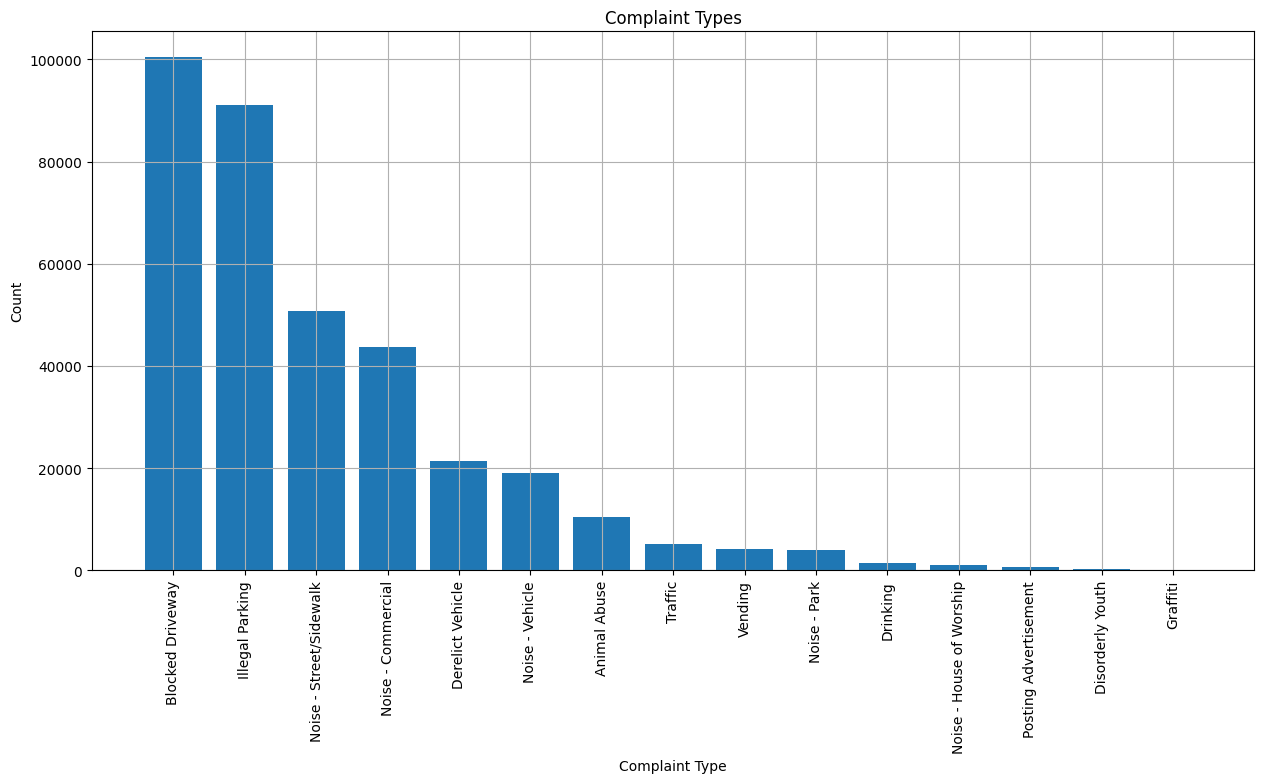

In [62]:
# Plotting the complaint types

complaint_counts = dataset['Complaint Type'].value_counts()

plt.figure(figsize=(15, 7))
plt.bar(complaint_counts.index, complaint_counts.values)
plt.xticks(rotation='vertical')
plt.title('Complaint Types')
plt.xlabel('Complaint Type')
plt.ylabel('Count')
plt.grid(True)
plt.show()

- Blocked Driveway is the Maximum Complaint type 

In [59]:
# Descriptors
dataset['Descriptor'].value_counts()

Descriptor
No Access                         75590
Loud Music/Party                  68668
Posted Parking Sign Violation     26817
Partial Access                    24865
Loud Talking                      23458
With License Plate                21419
Blocked Hydrant                   19717
Commercial Overnight Parking      14629
Blocked Sidewalk                  13615
Car/Truck Music                   11777
Double Parked Blocking Traffic     6952
Engine Idling                      5261
Neglected                          5114
Double Parked Blocking Vehicle     5082
Banging/Pounding                   4876
Car/Truck Horn                     4436
Congestion/Gridlock                3208
Other (complaint details)          2480
In Prohibited Area                 2197
Overnight Commercial Storage       2090
Unlicensed                         1965
Unauthorized Bus Layover           1579
Truck Route Violation              1120
Tortured                           1036
In Public                    

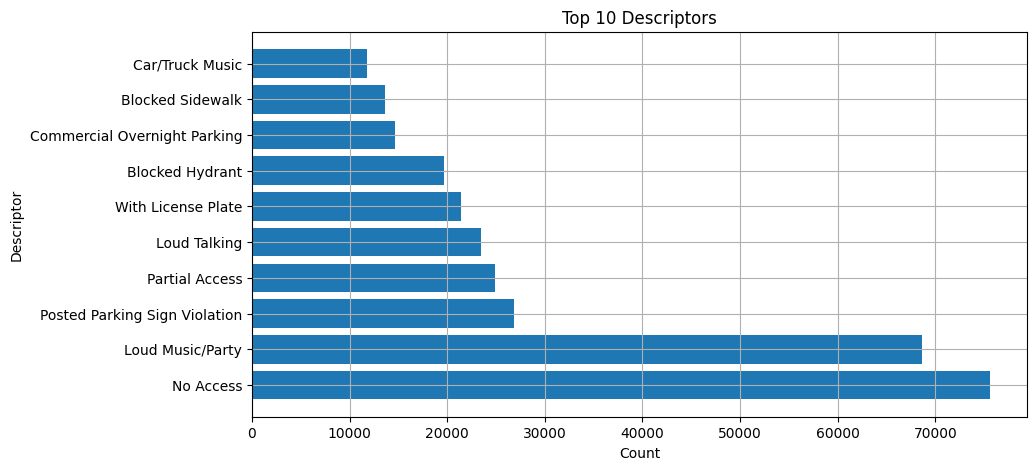

In [61]:
# Plotting top 10 Descriptors

top_descriptors = dataset['Descriptor'].value_counts().head(10)

plt.figure(figsize=(10, 5))
plt.barh(top_descriptors.index, top_descriptors.values)
plt.title('Top 10 Descriptors')
plt.xlabel('Count')
plt.ylabel('Descriptor')
plt.grid(True)
plt.show()

- No Access is the maximum descriptor

In [65]:
# Top 10 Location Type
dataset['Location Type'].value_counts().head(10)

Location Type
Street/Sidewalk               294128
Store/Commercial               24148
Club/Bar/Restaurant            21306
Residential Building/House      7466
Park/Playground                 4336
House of Worship                1059
Residential Building             529
House and Store                  245
Highway                          242
Parking Lot                      166
Name: count, dtype: int64

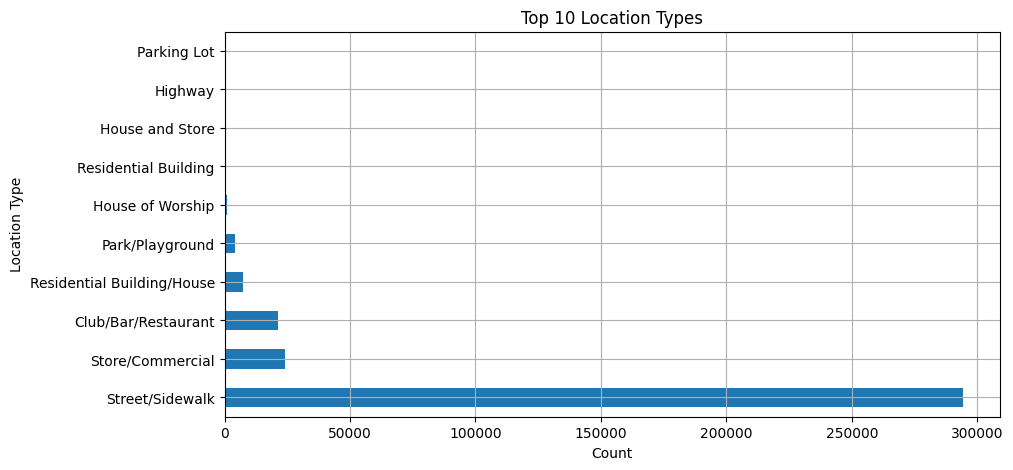

In [66]:
# Plotting Top 10 Location Type

location_counts = dataset['Location Type'].value_counts().head(10)

plt.figure(figsize=(10, 5))
location_counts.plot(kind='barh')
plt.title('Top 10 Location Types')
plt.xlabel('Count')
plt.ylabel('Location Type')
plt.grid(True)
plt.show()

- Street/Sidewalk is significantly higher compared to other areas

In [67]:
# Top 10 City Type
dataset['City'].value_counts().head(10)

City
BROOKLYN         117268
NEW YORK          72847
BRONX             48640
STATEN ISLAND     15191
JAMAICA            8772
ASTORIA            7910
FLUSHING           7431
RIDGEWOOD          6348
CORONA             5346
WOODSIDE           4300
Name: count, dtype: int64

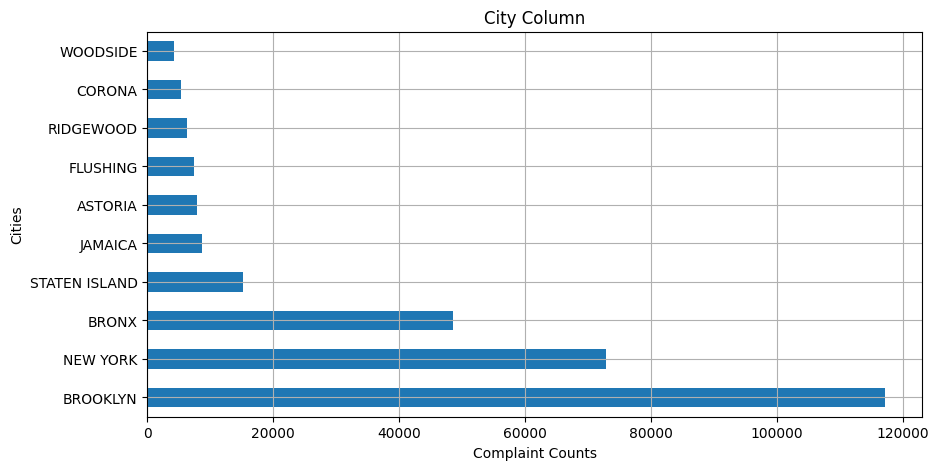

In [68]:
# Plotting Top 10 City Type

city_counts = dataset['City'].value_counts().head(10)

plt.figure(figsize=(10, 5))
city_counts.plot(kind='barh')
plt.title('City Column')
plt.xlabel('Complaint Counts')
plt.ylabel('Cities')
plt.grid(True)
plt.show()

- Brooklyn has the most complaints, followed by New York, Bronx, and Staten Island

In [92]:
# Borough
dataset['Borough'].value_counts().head()

Borough
BROOKLYN         117270
QUEENS            99835
MANHATTAN         72958
BRONX             48639
STATEN ISLAND     15188
Name: count, dtype: int64

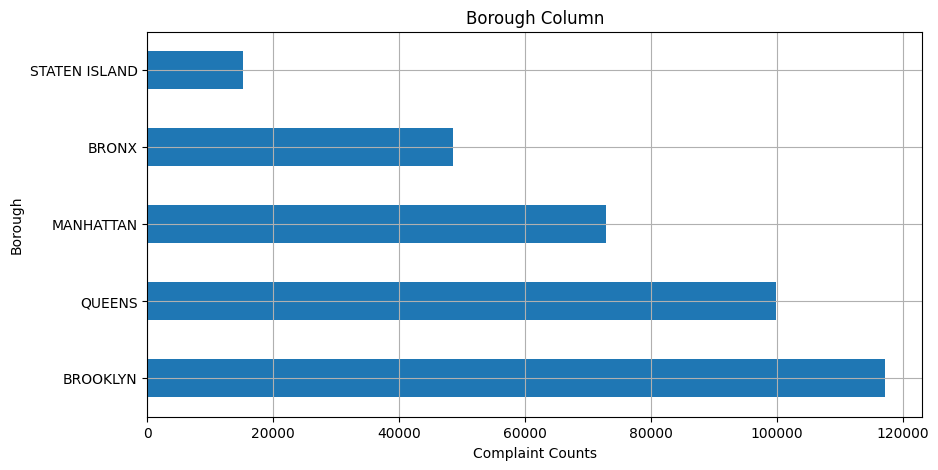

In [94]:
# Plooting Borough

borough_counts = dataset['Borough'].value_counts().head()

plt.figure(figsize=(10, 5))
borough_counts.plot(kind='barh')
plt.title('Borough Column')
plt.xlabel('Complaint Counts')
plt.ylabel('Borough')
plt.grid(True)
plt.show()

- Brooklyn appears to be the majority of complaints

#### So far, we have only analyzed one column. Now, let's broaden our analysis to include Borough and Complaint Types.

- Borough per Complaint Type

In [5]:
# Top 6 Complaints
top_6_complaints = dataset['Complaint Type'].value_counts()[:6].keys()
top_6_complaints

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle', 'Noise - Vehicle'],
      dtype='object', name='Complaint Type')

In [9]:
# Borough per Complaints
borough_complaints = dataset.groupby(['Borough', 'Complaint Type']).size().unstack()
borough_complaints = borough_complaints[top_6_complaints]
borough_complaints

Complaint Type,Blocked Driveway,Illegal Parking,Noise - Street/Sidewalk,Noise - Commercial,Derelict Vehicle,Noise - Vehicle
Borough,,,,,,
BRONX,17063.0,9888.0,9144.0,2945.0,2403.0,3556.0
BROOKLYN,36447.0,33533.0,13983.0,13860.0,6260.0,5966.0
MANHATTAN,2708.0,14561.0,22380.0,18702.0,694.0,6295.0
QUEENS,41486.0,27209.0,4681.0,7406.0,9919.0,3053.0
STATEN ISLAND,2845.0,6223.0,889.0,785.0,2184.0,424.0
Unspecified,332.0,1265.0,615.0,411.0,201.0,58.0


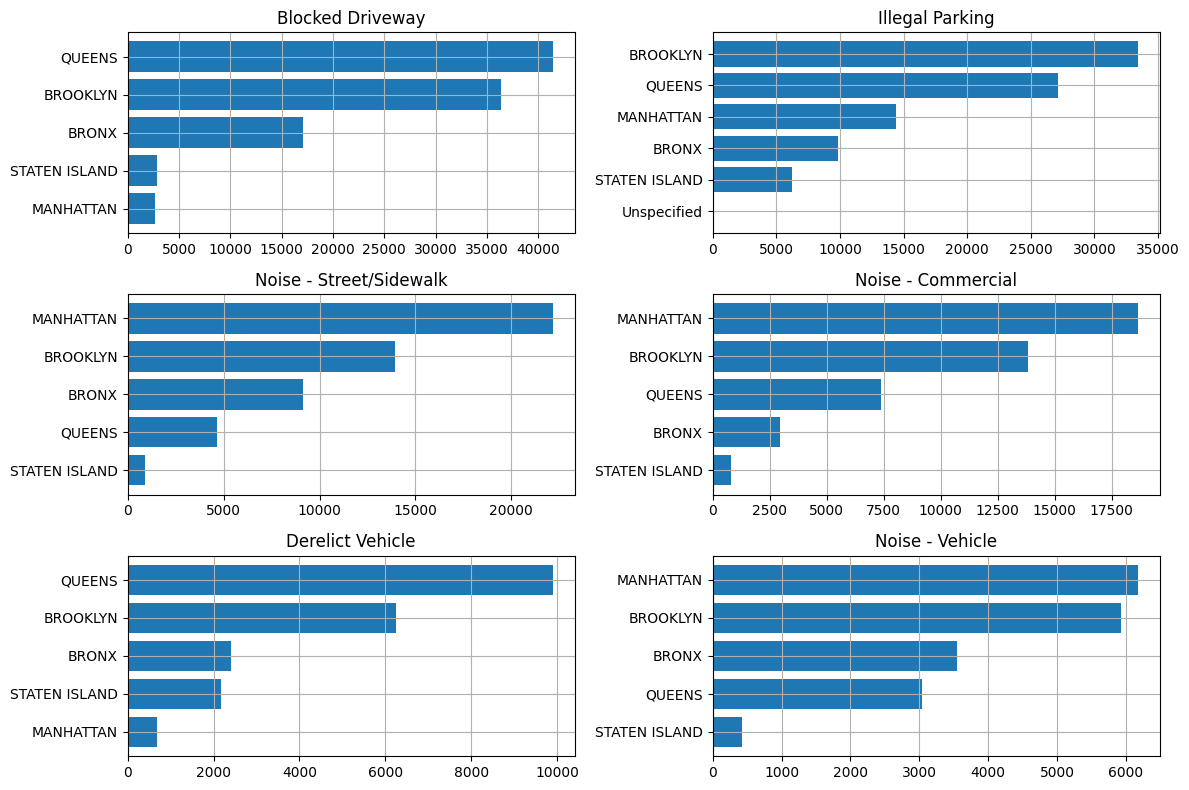

In [113]:
# Plotting Borough per Complaint Type 

col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number, col_number, figsize=(12, 8))

for i, (label, col) in enumerate(borough_complaints.items()):
    ax = axes[int(i / col_number), i % col_number]
    col = col.sort_values(ascending=True)[:15]
    ax.barh(col.index, col.values)
    ax.grid(True)
    ax.set_title(label)

plt.tight_layout()
plt.show()

- Queens has the most blocked driveways and derelict vehicles.
- Brooklyn has the most illegal parking incidents.
- Manhattan experiences the highest levels of street/sidewalk and commercial noise.
- Queens has the highest number of noise complaints related to vehicles.

- Similarly for Complaints per Borough

In [118]:
# similarly for Complaints per Borough
top_borough = dataset['Borough'].value_counts().keys()

complaint_per_borough = dataset.groupby(['Complaint Type', 'Borough']).size().unstack()
complaint_per_borough = complaint_per_borough[top_borough]
complaint_per_borough

Borough,BROOKLYN,QUEENS,MANHATTAN,BRONX,STATEN ISLAND,Unspecified
Complaint Type,,,,,,
Animal Abuse,3185.0,2637.0,1926.0,1966.0,786.0,NaN
Blocked Driveway,36414.0,41463.0,2686.0,17048.0,2844.0,NaN
Derelict Vehicle,6243.0,9911.0,687.0,2398.0,2180.0,NaN
Disorderly Youth,79.0,64.0,80.0,66.0,25.0,NaN
Drinking,291.0,395.0,320.0,205.0,188.0,NaN
Graffiti,60.0,51.0,25.0,15.0,6.0,NaN
Illegal Parking,33446.0,27168.0,14372.0,9852.0,6218.0,1.0
Noise - Commercial,13847.0,7386.0,18666.0,2941.0,783.0,NaN
Noise - House of Worship,387.0,347.0,217.0,90.0,18.0,NaN


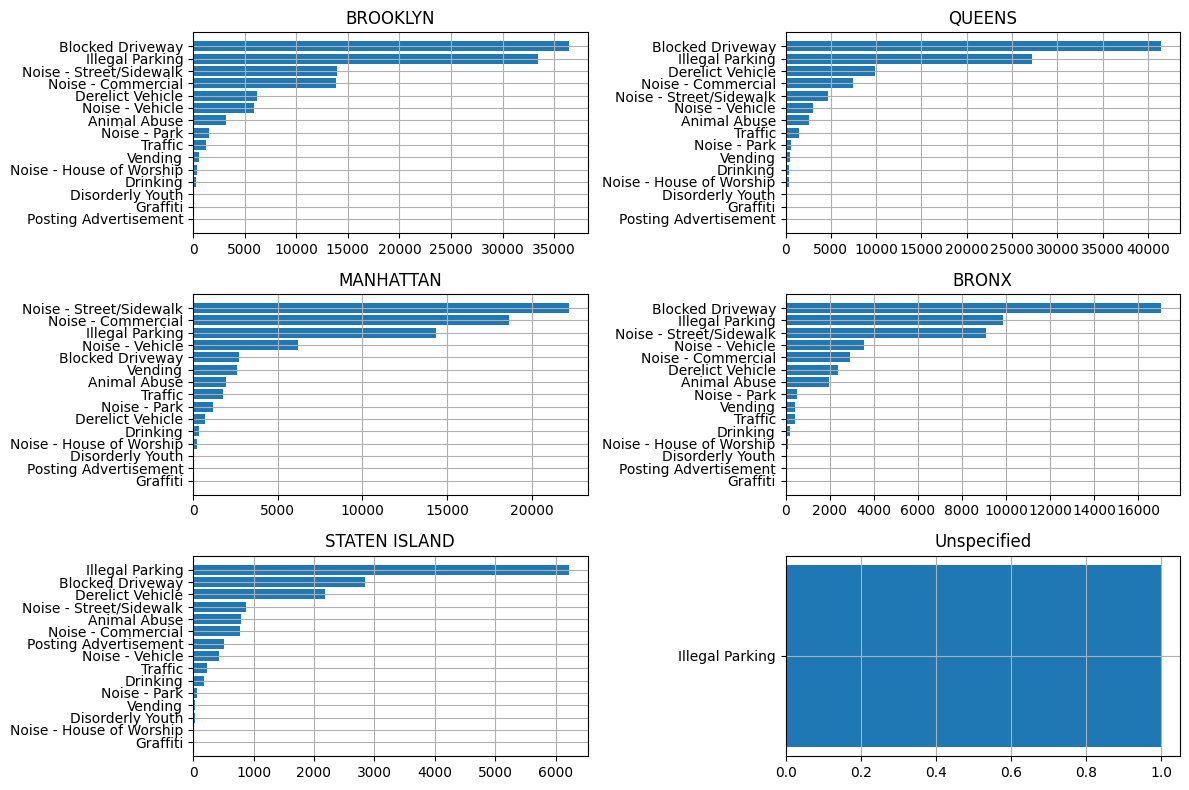

In [122]:
# Plotting Complaints per Borough

col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number, col_number, figsize=(12, 8))

for i, (label, col) in enumerate(complaint_per_borough.items()):
    ax = axes[int(i / col_number), i % col_number]
    col = col.sort_values(ascending=True)[:15]
    ax.barh(col.index, col.values)
    ax.grid(True)
    ax.set_title(label)

plt.tight_layout()
plt.show()

- Brooklyn, Queens, and the Bronx: Most blocked driveway complaints.
- Manhattan: Most noise (street/sidewalk) complaints.
- Staten Island: Most illegal parking complaints.

## 4. Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

### Here are the steps:

- Convert the data in the "Request_Closing_Time" column from days to hours.
- Add 1 to the converted value to account for partial hours.
- Calculate the mean of the converted data.
- Calculate the standard deviation of the converted data.

In [133]:
# Convert 'Request_Closing_Time' column to timedelta data type
dataset['Request_Closing_Time'] = pd.to_timedelta(dataset['Request_Closing_Time'])

# Create 'Request_Closing_Time_in_Hours' column and add 1 hour
dataset['Request_Closing_Time_in_Hours'] = dataset['Request_Closing_Time'].dt.total_seconds() / 3600 + 1

# View the two columns side by side for the first 20 entries
print(dataset[['Request_Closing_Time', 'Request_Closing_Time_in_Hours']].head(20))

   Request_Closing_Time  Request_Closing_Time_in_Hours
0       0 days 00:55:30                       1.925000
1       0 days 01:27:13                       2.453611
2       0 days 04:51:34                       5.859444
3       0 days 07:45:27                       8.757500
4       0 days 03:27:44                       4.462222
5       0 days 01:53:41                       2.894722
6       0 days 01:58:22                       2.972778
7       0 days 01:48:49                       2.813611
8       0 days 08:33:34                       9.559444
9       0 days 01:23:42                       2.395000
10      0 days 07:48:40                       8.811111
11      0 days 11:07:11                      12.119722
12      0 days 02:29:56                       3.498889
13      0 days 08:30:49                       9.513611
14      0 days 10:29:45                      11.495833
15      0 days 15:33:27                      16.557500
16      0 days 04:52:39                       5.877500
17      0 

In [146]:
# Get the average request closing time for each city and complaint type
data_avg_time_in_hrs = dataset.groupby(['City', 'Complaint Type'])['Request_Closing_Time_in_Hours'].mean()

# Get the top 10 rows of data
data_avg_time_in_hrs = data_avg_time_in_hrs.head(10)

# Print the data
print(data_avg_time_in_hrs)

City     Complaint Type          
ARVERNE  Animal Abuse                3.333110
         Blocked Driveway            3.310789
         Derelict Vehicle            4.165000
         Disorderly Youth            4.591250
         Drinking                    1.238611
         Graffiti                    2.530000
         Illegal Parking             3.335022
         Noise - Commercial          3.287222
         Noise - House of Worship    2.848175
         Noise - Park                2.288333
Name: Request_Closing_Time_in_Hours, dtype: float64


In [136]:
# Convert 'Request_Closing_Time' column to timedelta data type
dataset['Request_Closing_Time'] = pd.to_timedelta(dataset['Request_Closing_Time'])

# Create a new column 'Request_Closing_Time_in_Seconds' and convert 'Request_Closing_Time' to seconds
dataset['Request_Closing_Time_in_Seconds'] = dataset['Request_Closing_Time'].dt.total_seconds()

# View the updated dataset
print(dataset[['Request_Closing_Time', 'Request_Closing_Time_in_Seconds']].head(20))

   Request_Closing_Time  Request_Closing_Time_in_Seconds
0       0 days 00:55:30                           3330.0
1       0 days 01:27:13                           5233.0
2       0 days 04:51:34                          17494.0
3       0 days 07:45:27                          27927.0
4       0 days 03:27:44                          12464.0
5       0 days 01:53:41                           6821.0
6       0 days 01:58:22                           7102.0
7       0 days 01:48:49                           6529.0
8       0 days 08:33:34                          30814.0
9       0 days 01:23:42                           5022.0
10      0 days 07:48:40                          28120.0
11      0 days 11:07:11                          40031.0
12      0 days 02:29:56                           8996.0
13      0 days 08:30:49                          30649.0
14      0 days 10:29:45                          37785.0
15      0 days 15:33:27                          56007.0
16      0 days 04:52:39        

In [141]:
# Get the average request closing time for each city and complaint type in seconds
data_avg_in_seconds = dataset.groupby(['City', 'Complaint Type']).Request_Closing_Time_in_Seconds.mean()

# Get the top 10 rows of data
data_avg_in_seconds.head(10)

City     Complaint Type          
ARVERNE  Animal Abuse                 8399.195652
         Blocked Driveway             8318.840000
         Derelict Vehicle            11394.000000
         Disorderly Youth            12928.500000
         Drinking                      859.000000
         Graffiti                     5508.000000
         Illegal Parking              8406.080645
         Noise - Commercial           8234.000000
         Noise - House of Worship     6653.428571
         Noise - Park                 4638.000000
Name: Request_Closing_Time_in_Seconds, dtype: float64

- Other analysis works on Time

In [142]:
# Analyze the 'Request_Closing_Time' column using the describe() function
request_closing_time_stats = dataset['Request_Closing_Time'].describe()

# Display the statistics of the 'Request_Closing_Time' column
print(request_closing_time_stats)

count                       353891
mean     0 days 04:11:24.057729639
std      0 days 05:50:01.901604780
min                0 days 00:01:01
25%                0 days 01:15:31
50%                0 days 02:40:05
75%                0 days 05:13:55
max               24 days 16:52:22
Name: Request_Closing_Time, dtype: object


In [143]:
# Calculate the mean and standard deviation of 'Request_Closing_Time_in_Hours' column
mean_hrs = dataset['Request_Closing_Time_in_Hours'].mean()
std_hrs = dataset['Request_Closing_Time_in_Hours'].std()

# Calculate the mean and standard deviation of 'Request_Closing_Time_in_Seconds' column
mean_seconds = dataset['Request_Closing_Time_in_Seconds'].mean()
std_seconds = dataset['Request_Closing_Time_in_Seconds'].std()

# Display the mean and standard deviation in hours and seconds
print('The mean hours is {0:.2f} hours and mean seconds is {1:.2f} seconds'.format(mean_hrs, mean_seconds))
print('The standard deviation in hours is {0:.2f} hours and standard deviation in seconds is {1:.2f} seconds'.format(std_hrs, std_seconds))

The mean hours is 5.19 hours and mean seconds is 15084.06 seconds
The standard deviation in hours is 5.83 hours and standard deviation in seconds is 21001.90 seconds


## 5. Perform a statistical test for the following:

Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

- Whether the average response time across complaint types is similar or not (overall)
- Are the type of complaint or service requested and location related?

In [147]:
dataset.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'City',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude',
       'Request_Closing_Time', 'Request_Closing_Time_in_Hours',
       'Request_Closing_Time_in_Seconds'],
      dtype='object')

In [148]:
# Get the average response time in seconds for different complaint types
avg_response_time = dataset.groupby('Complaint Type')['Request_Closing_Time_in_Seconds'].mean()
avg_response_time = avg_response_time.sort_values(ascending=True)

# Print the data
print(avg_response_time)

Complaint Type
Posting Advertisement        7287.171091
Noise - Commercial          11042.455562
Noise - House of Worship    11410.395656
Noise - Park                12196.250125
Noise - Street/Sidewalk     12219.275836
Traffic                     12324.517729
Disorderly Youth            12395.754777
Noise - Vehicle             12586.495921
Drinking                    13805.907791
Vending                     14355.265738
Illegal Parking             15582.870960
Blocked Driveway            16217.841222
Animal Abuse                18052.146476
Graffiti                    23276.343949
Derelict Vehicle            25281.668519
Name: Request_Closing_Time_in_Seconds, dtype: float64


- Null Hypothesis -->> Average response time across complaint types is similar(overall).
- Alternate Hypothesis -->> Average response time across complaint types is not similar(overall).

### Null hypothesis rejected: Average response time in seconds varies across complaint types.

## Testing for our Hypothesis

#### ANOVA Test for Top 5 Complaint Types:
- Confidence Interval: 95%
- Alpha (α): 0.05
- If p-value < α: Reject Null Hypothesis (Average response time for complaint types is not the same)
- If p-value > α: Fail to reject Null Hypothesis (Average response time for complaint types is the same)

In [151]:
# Create a dictionary to store the data
data = {}

# Iterate over the unique complaint types
for complaint in dataset['Complaint Type'].unique():

    # Get the data for the current complaint type
    data_complaint = dataset[dataset['Complaint Type'] == complaint]

    # Calculate the log of the request closing time
    log_request_closing_time = np.log(data_complaint['Request_Closing_Time_in_Seconds'])

    # Store the data in the dictionary
    data[complaint] = log_request_closing_time

In [152]:
data.keys()

dict_keys(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Noise - Park', 'Graffiti', 'Disorderly Youth'])

In [153]:
# Calculate the standard deviation of the log of the request closing time for each complaint type
for complaint in data.keys():
    print(np.std(data[complaint]))

1.1034318653800415
0.9648213536268848
1.0738516222432681
1.2451740476134914
1.0905961737805874
1.1720670361552994
1.225186701896675
1.079395668737474
1.0365222349083152
1.1141637838115737
1.1832759514887403
1.0485256678666683
1.120677400670091
1.0061277319427055
1.0323649941532969


In [159]:
from scipy import stats

# Select the top 5 complaint types
stat, p = f_oneway(data['Blocked Driveway'], data['Illegal Parking'], data['Noise - Street/Sidewalk'],
                   data['Derelict Vehicle'], data['Noise - Commercial'])
# Print the results
print('Statistics= {0:.3f}, p = {1:.3f}'.format(stat, p))

# Set the significance level
alpha = 0.05

# Determine if we should reject the null hypothesis
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('We have Different distributions (reject H0)')

Statistics= 2811.335, p = 0.000
We have Different distributions (reject H0)


- Low p-value: The p-value is very low and is being rounded down to 0.0.
- Conclusion: Based on the low p-value compared to the critical p-value, we reject the Null Hypothesis.
- Finding: There is sufficient evidence to support the claim that the average response time for all complaint types is not the same.

### For relation between Complaint Type and Location

Utilizing a crosstab analysis along with a chi-square test

In [160]:
# Create a crosstab of the city and complaint type
city_type = pd.crosstab(dataset['City'], dataset['Complaint Type'])

# View the first 5 entries of the crosstab
city_type.head()

Complaint Type,Animal Abuse,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Illegal Parking,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Posting Advertisement,Traffic,Vending
City,,,,,,,,,,,,,,,
ARVERNE,46,50,32,2,1,1,62,2,14,2,29,9,0,1,1
ASTORIA,170,3436,426,5,43,4,1337,1640,21,64,408,236,3,60,57
Astoria,0,159,14,0,0,0,277,310,0,0,145,0,0,0,0
BAYSIDE,53,513,231,2,1,3,635,47,3,3,17,24,0,9,2
BELLEROSE,15,138,120,2,1,0,131,38,1,1,13,11,1,9,0


In [161]:
# Create a crosstab of the city and complaint type
city_type = pd.crosstab(dataset['City'], dataset['Complaint Type'])

# Calculate the chi-squared test statistic, p-value, degrees of freedom, and expected frequencies
stat, p, dof, expected = chi2_contingency(city_type)

# Print the degrees of freedom
print('The Degrees of Freedom are : {}'.format(dof))

# Print the p-value
print('The P-Value of the Testing is {}: '.format(p))

# Print the expected frequencies
print('Expected values : \n')
print(expected)

The Degrees of Freedom are : 728
The P-Value of the Testing is 0.0: 
Expected values : 

[[7.47687847e+00 7.15323645e+01 1.52521200e+01 2.23594271e-01
  9.96205046e-01 1.11797135e-01 6.48402022e+01 3.10632257e+01
  7.54096600e-01 2.84406215e+00 3.61674414e+01 1.36164638e+01
  4.82792724e-01 3.67506379e+00 2.96369221e+00]
 [2.34690908e+02 2.24532144e+03 4.78747100e+02 7.01837571e+00
  3.12697695e+01 3.50918786e+00 2.03526190e+03 9.75040139e+02
  2.36702544e+01 8.92719510e+01 1.13525580e+03 4.27405670e+02
  1.51543272e+01 1.15356169e+02 9.30270055e+01]
 [2.68514882e+01 2.56892023e+02 5.47744786e+01 8.02987361e-01
  3.57764114e+00 4.01493680e-01 2.32858663e+02 1.11556426e+02
  2.70816438e+00 1.02137946e+01 1.29887041e+02 4.89003959e+01
  1.73383895e+00 1.31981458e+01 1.06434185e+01]
 [4.57810456e+01 4.37993803e+02 9.33889729e+01 1.36907127e+00
  6.09977931e+00 6.84535634e-01 3.97017587e+02 1.90200624e+02
  4.61734545e+00 1.74142377e+01 2.21453818e+02 8.33738241e+01
  2.95614751e+00 2.2502

In [172]:
# Interprets the test statistics for a chi-squared test
prob = 0.95  # as alpha is considered 0.05
dof = 10  # Example degrees of freedom, replace with the actual value

critical_value = stats.chi2.ppf(prob, dof)
print('Critical Value:', critical_value)


Critical Value: 18.307038053275146


In [173]:
prob = 0.95  # as alpha is considered 0.05
critical_value = stats.chi2.ppf(prob, dof)
stat = 1.8  # Example test statistic, replace with the actual value
p = 0.03  # Example p-value, replace with the actual value

print('Probability = {}, Critical Value = {}, Test statistic = {}'.format(prob, critical_value, stat))
print()

if abs(stat) >= critical_value:
    print('Dependent (Reject H0 or Null Hypothesis)')
else:
    print('Independent (Failed to reject Null Hypothesis)')

# Interpreting the P-Value
alpha = 1 - prob
print('Significance: %.3f, P-Value: %.2f' % (alpha, p))
if p <= alpha:
    print('Dependent (Reject H0 or Null Hypothesis)')
else:
    print('Independent (Failed to reject Null Hypothesis)')

Probability = 0.95, Critical Value = 18.307038053275146, Test statistic = 1.8

Independent (Failed to reject Null Hypothesis)
Significance: 0.050, P-Value: 0.03
Dependent (Reject H0 or Null Hypothesis)


----------------------------------------------------------------------------

# Thank you